In [1]:
import tango
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import time

# Basler_AG Camera Example

In [2]:
camara_device = tango.DeviceProxy("camera/basler_ag/1")
print(camara_device.state())
camara_device.set_timeout_millis(9000)

ON


In [3]:
camara_device.get_command_list()

['ChangeParameters', 'Init', 'Snap', 'StartAcqusition', 'State', 'Status', 'StopAcqusition', 'ToggleExpouserAuto', 'ToggleGainrAuto']

In [7]:
camara_device.get_attribute_list()

['ExposureTime', 'Gain', 'FramesTrigger', 'ROI', 'Image', 'State', 'Status']

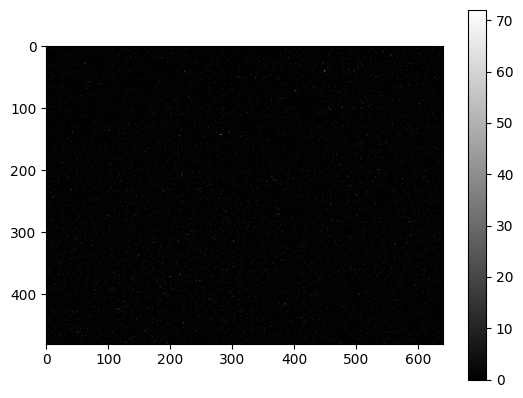

In [9]:
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

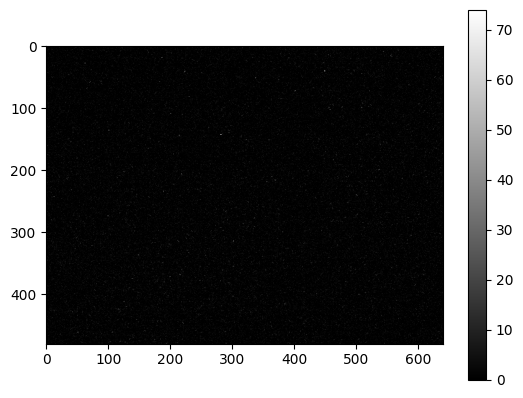

In [10]:
camara_device.ROI = [0, 0, 640, 480]
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

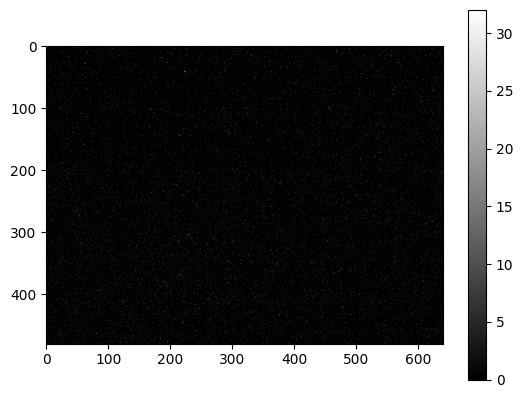

In [15]:
camara_device.ExposureTime = 0.5 # in microseconds
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

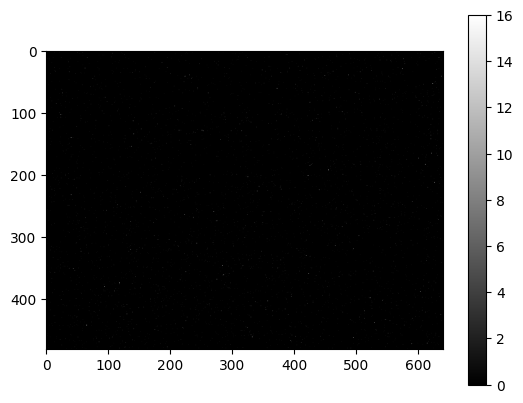

In [18]:
camara_device.ToggleExpouserAuto(True)
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

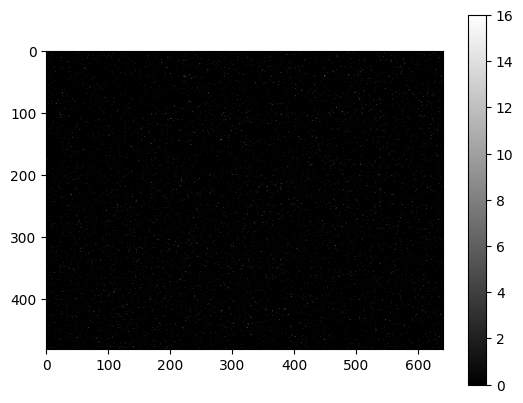

In [19]:
camara_device.Gain = 1.5 # in microseconds
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

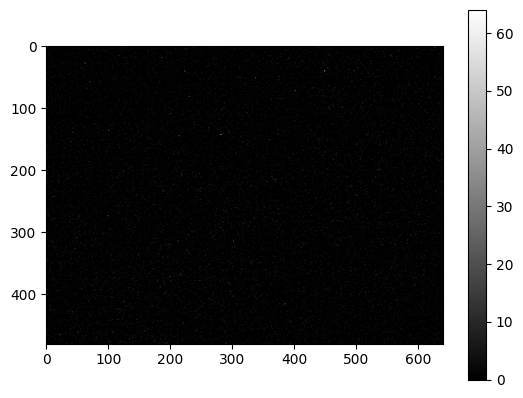

In [20]:
camara_device.Gain = 15 # in microseconds
camara_device.Snap()
plt.imshow(camara_device.Image,cmap='gray')
plt.colorbar()
plt.show()

In [30]:
camara_device = tango.DeviceProxy("camera/thorlabs/zelux44")
print(camara_device.state())
camara_device.set_timeout_millis(9000)

ON


In [31]:
camara_device.get_command_list()

['ChangeParameters', 'Init', 'Snap', 'StartAcqusition', 'State', 'Status', 'StopAcqusition']

In [6]:
camara_device.StartAcqusition()

''

In [33]:
camara_device.Snap()

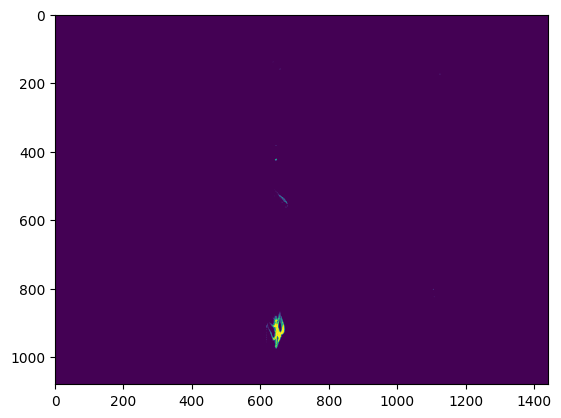

In [34]:
plt.imshow(camara_device.Image)

In [41]:
camara_device.TakePhoto("C1")

'Taking photo Wait the exposure time before calling the GetData function'

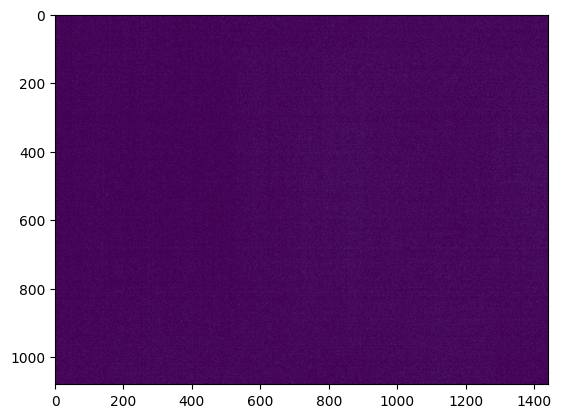

In [49]:
J = camara_device.GetDataPhoto("C1")
nd_image_array = json.loads(J)
array_p = np.array(nd_image_array["Image"])
plt.imshow(array_p)

In [2]:
greateyesCCD = tango.DeviceProxy("voxel/greateyesCCD/1")
print(greateyesCCD.state())
greateyesCCD.set_timeout_millis(120000)


ON


In [4]:
greateyesCCD.get_command_list()

['Init', 'State', 'Status', 'get_foto_JSON', 'output_on_off']

In [5]:
greateyesCCD.get_attribute_list()

['current', 'noise', 'Image_foto', 'voltage', 'State', 'Status']

In [3]:
J= greateyesCCD.get_foto_JSON()

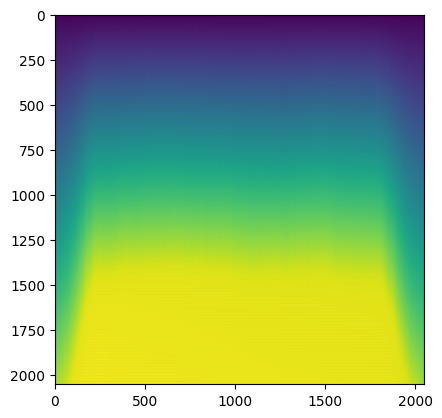

In [4]:
nd_image_array = json.loads(J)
array_p = np.array(nd_image_array["Image"])
plt.imshow(array_p)

In [5]:
p =greateyesCCD.Image_foto

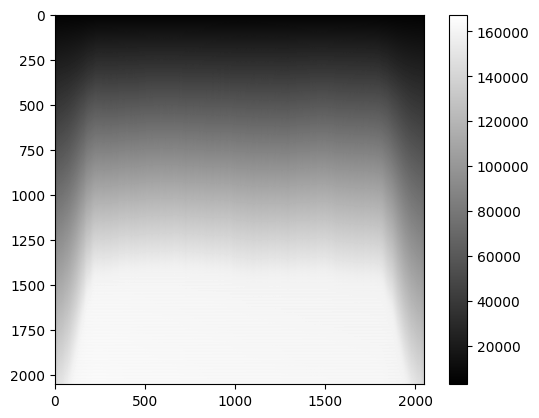

In [6]:
array_p = np.array(p)
plt.imshow(array_p,cmap="grey")
plt.colorbar()
plt.show()

In [53]:
SLM = tango.DeviceProxy("voxel/SLM/1")
print(SLM.state())
SLM.set_timeout_millis(120000)

ON


In [54]:
SLM.get_command_list()

['CustomImage', 'CylindricalLens', 'Init', 'LaguerreGauss', 'State', 'Status', 'StopDisplay']

In [55]:
Rand = np.random.randint(0, 255,1280*1024)

In [57]:
SLM.CustomImage(Rand)

'Test'

In [59]:
SLM.StopDisplay()

'theard Stopped'

In [10]:
Standa = tango.DeviceProxy("voxel/StandaM/1")
print(Standa.state())
Standa.set_timeout_millis(120000)

ON


In [11]:
Standa.get_command_list()

['Init', 'State', 'Status', 'connection', 'get_list_diveces', 'get_position', 'move_calibrat', 'move_to', 'relative_shift', 'set_device', 'set_device_as_virtual', 'set_user_unit', 'set_zero']

In [12]:
Standa.get_list_diveces()

"Dice found: {'uri': 'xi-com:\\\\\\\\.\\\\COM3', 'device_serial': 1599169793, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t"

In [13]:
Standa.set_device('3')

'it was selected the device 3'

In [14]:
Standa.connection("open")

'Connection established'

In [19]:
Standa.get_position()

'Position: 0\nuPosition: 0\nEncPosition: 0\n'

In [18]:
Standa.move_to(0)

'Stop moving at -1'

In [38]:
import tango
import json
N_AG_UC8 = tango.DeviceProxy("voxel/ag_uc8/1")
N_AG_UC8.set_timeout_millis(120000)
print(N_AG_UC8.state())

ON


In [39]:
AG_UC8 = {
            "Name"      : "Controller_1",
            "COM"       : 6,   
         }

AG_UC8 = json.dumps(AG_UC8)
print(N_AG_UC8.Connect(AG_UC8))

ola


In [40]:
Controller_info=  {
                        "Name"      : "Controller_1",
                        "Channel"   : 1,             
                        "Axis"      : 1              
                    }

Controller_info = json.dumps(Controller_info)

N_AG_UC8.Reset(Controller_info)

'The controller was reseted'

In [41]:
N_AG_UC8.ZeroPosition(Controller_info)

'Channel 1, Axies 1 was set to zero'

In [42]:
print(N_AG_UC8.Steps(Controller_info))


0


# Change the amplitude of the step (AG_UC8)
If you want to see the step that the controller has just remove the key "Amplitude"

In [63]:
Controller_change_ample_p =  {
                        "Name"      : "Controller_1",
                        "Channel"   : 1,             
                        "Axis"      : 1
                        # "Amplitude" : 10
                    }

Controller_info_ampl_p = json.dumps(Controller_change_ample_p)

In [64]:
print("Initial step amplitude:", N_AG_UC8.StepAmplitudePos(Controller_info_ampl_p))

Initial step amplitude: 10


In [60]:
Controller_change_ample_n =  {
                        "Name"      : "Controller_1",
                        "Channel"   : 1,             
                        "Axis"      : 1
                        # "Amplitude" : 10
                    }

Controller_info_ampl_n = json.dumps(Controller_change_ample_n)

In [61]:
print("Initial step amplitude:", N_AG_UC8.StepAmplitudeNeg(Controller_info_ampl_n))

Initial step amplitude: 35


## End of Change the amplutude step

In [65]:
Move_info = {
                "Name"      : "Controller_1",
                "Channel"   : 1,
                "Axis"      : 1,
                "Position"  : 10000
            }
Move_info = json.dumps(Move_info)

N_AG_UC8.MoveRel(Move_info)

' The motor is starting moving'

In [43]:
print(N_AG_UC8.StatusMotor(Controller_info))
print(N_AG_UC8.Steps(Controller_info))

 Status: stepping
3432


In [88]:
import tango
import json
SMC100 = tango.DeviceProxy("voxel/SMC100/1")
print(SMC100.state())
SMC100.set_timeout_millis(50000)

ON


In [89]:
userInfoController =  {
                            "Name"                  : "SC1",
                            "COM"                   : 5,
                            "Number_of_controllers" : 3
                        }
userInfoController=json.dumps(userInfoController)
SMC100.ConnectCamera(userInfoController)

'Controller has been connected successfully COM5'

In [43]:
userInfoP = {
                "Name" : "SC1",
                "Axis" : 1
            }
userInfoP=json.dumps(userInfoP)
SMC100.GetPosition(userInfoP)

-0.0

In [84]:
userInfoMA =    {
                    "Name"              : "SC1",
                    "Axis"              : 1,
                    "Position"          : 5,
                    "Wait_to_finish"    : True
                }

userInfoMA=json.dumps(userInfoMA)
SMC100.MoveAbsolute_mm(userInfoMA)

'Motor is moving to the position'

In [85]:
userInfoMTA = {
                "Name"              : "SC1",
                "Axis"              : 1,
                "Position"          : 3
                }
userInfoMTA=json.dumps(userInfoMTA)
SMC100.GetMotionTimeForAbsoluteMove(userInfoMTA)

5.14

In [86]:
userInfoMTA = {
                "Name"              : "SC1",
                "Axis"              : 1,
                "Position"          : 3
                }
userInfoMTA=json.dumps(userInfoMTA)
SMC100.GetMotionTimeForRelativeMove(userInfoMTA)

7.64

In [87]:

userInfoS = {
                "Name"              : "SC1",
                "Axis"              : 1
            }
userInfoS=json.dumps(userInfoS)
SMC100.GetStatus(userInfoS)

'  state: READY from MOVING'

In [1]:
import tango
import json
Arduino_Shutter = tango.DeviceProxy("voxel/Arduino_Shutter/1")
print(Arduino_Shutter.state())
Arduino_Shutter.set_timeout_millis(10000)

ON


In [2]:
ArduinoInfo =   {
                    "Name"      : "AS1",
                    "COM"       : 4
                }
ArduinoInfo = json.dumps(ArduinoInfo)
Arduino_Shutter.Connect(ArduinoInfo)

'Device is connected'

In [3]:
Device_to_Open =    {
                        "Name"      : "AS1"
                    }
Device_to_Open= json.dumps(Device_to_Open)
Arduino_Shutter.OpenShutter(Device_to_Open)

'On was executed\r\n'

In [4]:
Device_to_Open =    {
                        "Name"      : "AS1"
                    }
Device_to_Open= json.dumps(Device_to_Open)
Arduino_Shutter.CloseShutter(Device_to_Open)

'Off was executed\r\n'

# IDS 

The IDS Cameras need to be connected to a USB-3 Connecter of the PC due to power

In [147]:
import tango
import numpy as np
import json
IDS_Camera = tango.DeviceProxy("camera/IDS/3")  # change the Device name if you want to use a diferent camera
print(IDS_Camera.state())
IDS_Camera.set_timeout_millis(50000)

ON


In [148]:
IDS_Camera.get_command_list()

['ChangeParameters', 'Init', 'Snap', 'StartAcqusition', 'State', 'Status', 'StopAcqusition']

In [150]:
IDS_Camera.get_attribute_list()

['ExposureTime', 'Gain', 'FramesTrigger', 'ROI', 'Image', 'State', 'Status']

In [154]:

IDS_Camera.ExposureTime = 0.5  # ms  Don't go abave 50 ms it will break the code, need to see why 

In [157]:
IDS_Camera.Snap()

''

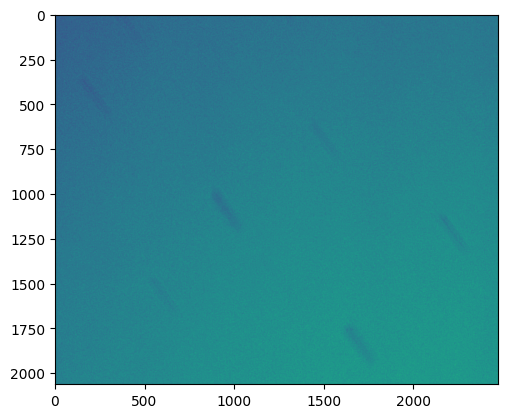

In [158]:
array_p = np.array(IDS_Camera.Image)
plt.imshow(array_p)

In [2]:
import time
import qcodes
from qcodes_contrib_drivers.drivers.Newport.AG_UC8 import Newport_AG_UC8

ctl = Newport_AG_UC8("Newport", "ASRL6")

ctl.get_idn()

{'vendor': 'Newport', 'model': 'AG-UC8', 'firmware': 'v2.2.1'}